In [1]:
import pandas as pd
import numpy as np
from iteration_utilities import deepflatten

# Hourglass Coordinates

In [2]:
#create a better range function
def btw(j,k):
    return list(range(j,k))

In [3]:
#load in X coords
X = np.repeat(1,23), np.repeat(2,23), np.repeat(3,23),np.repeat(4,23),np.repeat(5,21),np.repeat(6,19),np.repeat(7,17),np.repeat(8,15),np.repeat(9,13),np.repeat(10,11),np.repeat(11,9),np.repeat(12,7),np.repeat(13,5),np.repeat(14,3),np.repeat(15,3),np.repeat(16,1),np.repeat(17,1),np.repeat(21,1),np.repeat(25,1),np.repeat(26,1),np.repeat(27,3),np.repeat(28,3),np.repeat(29,5),np.repeat(30,7),np.repeat(31,9),np.repeat(32,11),np.repeat(33,13),np.repeat(34,15),np.repeat(35,17),np.repeat(36,19),np.repeat(37,21),np.repeat(38,23),np.repeat(39,23),np.repeat(40,23),np.repeat(41,23)
#load in Y coords
Y = [btw(4,27),btw(4,27),btw(4,27),btw(4,27),btw(5,26),btw(6,25),btw(7,24),btw(8,23),btw(9,22),btw(10,21),btw(11,20),btw(12,19),btw(13,18),btw(14,17),btw(14,17),15,15,15,15,15,btw(14,17),btw(14,17),btw(13,18),btw(12,19),btw(11,20),btw(10,21),btw(9,22),btw(8,23),btw(7,24),btw(6,25),btw(5,26),btw(4,27),btw(4,27),btw(4,27),btw(4,27)]

In [4]:
#flatten lists
X = [item for sublist in X for item in sublist]
Y = list(deepflatten(Y))

In [5]:
#ensure enough for all congressional districts
print(len(X),len(Y))

435 435


In [6]:
#convert to dataframe
d = {'X': X, 'Y': Y}
hg = pd.DataFrame(data=d)

In [7]:
#offset every other row so the hexes will align
hg["X"] = np.where(((hg["Y"] % 2) != 0) & (hg["X"] > 22), hg['X'], (hg["X"] - .5))
hg["X"] = np.where(((hg["Y"] % 2) != 0) & (hg["X"] < 20), hg['X'], (hg["X"] + .5))

In [8]:
#center on 0
hg["X"] = hg["X"] - 21
hg["Y"] = hg["Y"] - 15

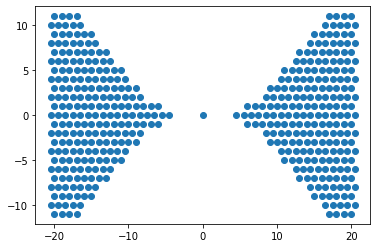

In [9]:
#check with plot
import matplotlib.pyplot as plt
plt.scatter(hg.X,hg.Y)

In [10]:
#export coordinates
hg.to_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/app_building/app_data/hourglass_coords.csv", index = False)

# State Cartogram

In [11]:
#path tableau prep workbook for state hextmap
redraw_workbook = "/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/processed/2022_redraw_workbook.csv"

In [12]:
#read in file
sc = pd.read_csv(redraw_workbook)

In [13]:
#extract state coordinates
#remove old maps
sc = sc[sc["State Status"] != "Overturned Map"]
#only use necessary rows
sc = sc[["ST","State","row","column"]]
#rename columns
sc.columns = ["ST","state","Y","X"]

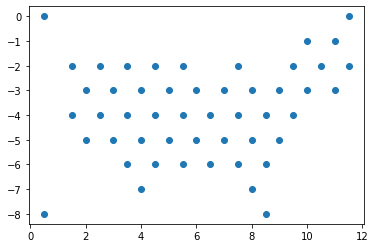

In [14]:
#check with plot
import matplotlib.pyplot as plt
plt.scatter(sc.X,sc.Y)

In [15]:
#export coordinates
sc.to_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/app_building/app_data/cartogram_coords.csv", index = False)

# State Data

In [16]:
#path tableau prep workbook for block slider
aggregated_fairness = "/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/processed/aggregated_fairness.csv"

In [17]:
#read in file
cd = pd.read_csv(aggregated_fairness)

In [18]:
#confirm it represents 50 states over 10 years
cd.shape

(500, 15)

In [19]:
#export data
cd.to_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/app_building/app_data/state_data.csv", index = False)